# Housing Dataset Analysis

## Introduction
In this project we are going to perform a linear Regression analysis that's going to cover both inferential modeling and predictive modeling. At the end of the analysis we are going to provide a final report on all of our findings.

## Business Understanding
Our client is a real estate agency suituated in King County, Washington that helps homewoners buy / or sell homes. They are looking to get a better understanding on what features about a house are the most important when trying to estimate a homes price in that area and they also what you to come up with a pricing algorithm that can help them to determine the pricing of future homes.

## Data Understanding

We have been provided access to data containing information on over 10,000 homes together with their respective attributes. The datasets are contained in the Data folder where:
 1. kc_house_data.csv contains data on the different homes together with their attributes
 2. column_names.md contains a breakdown on the Column Names and their descriptions for Kings County Data Set

## Load the Data
 
 In the cells below, load the relevant libraries and load the data

In [1]:
# load the imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import itertools

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv('Data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


## Data Cleaning

### Check the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Based on the summary above, the columns are made up of 21 columns with 21597 entries. There are three columns with missing values(waterfront, view, yr_renovated). The column data types are mainly int64, float64, with  2 columns with the object data type.

On further investigation, i noticed the sqft_basement column is assigned the object datatype and its a numerical variable. Below i will assign a numerical datatype to the sqft_basement column

In [4]:
data['sqft_basement'].value_counts()

0       12826
?         454
600       217
500       209
700       208
        ...  
276         1
2500        1
588         1
1770        1
2250        1
Name: sqft_basement, Length: 304, dtype: int64

Based on the summary above there is an entry(?) which on further investigation i discovered it represents the homes in which they aren't really sure is they have a basement or don't know if they have a basement.

Based on this, i will replace the '?' entry with 0 below.

In [5]:
data['sqft_basement'] = data['sqft_basement'].replace('?', '0')

In [6]:
data['sqft_basement'].value_counts()

0       13280
600       217
500       209
700       208
800       201
        ...  
276         1
2500        1
588         1
1770        1
2250        1
Name: sqft_basement, Length: 303, dtype: int64

From the output above, i have replaced '?' with 0.

Below i will assign the sqft_basement column with a numerical datatype

In [7]:
data['sqft_basement'] = data['sqft_basement'].astype(np.int64)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the output above, i have successfully assigned a new data type to the sqft_basement column

Below, i will find the sum of the values of the sqft_basement column and the sqft_above column and investigate if the sum of the two will give the same values as the values contained in the sqft_living column.


In [9]:
#  find the sum of the two columns
data['sum_columns'] = data['sqft_basement'] + data['sqft_above']
data['sum_columns']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sum_columns, Length: 21597, dtype: int64

In [10]:
data['sqft_living'] == data['sum_columns']

0        True
1        True
2        True
3        True
4        True
         ... 
21592    True
21593    True
21594    True
21595    True
21596    True
Length: 21597, dtype: bool

Based on the output above, it is evident that the values are the same. Therefore, i will drop the sqft_basement and sqft_above columns in order to reduce multicollinearity within the dataset and i will also drop the id and date columns as they won't be used when carrying out the analysis.

In [11]:
data.drop(['id', 'date', 'sqft_basement', 'sqft_above', 'sum_columns'], axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 2.8 MB


### Check for Null values.

In [14]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As concluded above there are three columns with missing values, i will then drop the rows with missing values.


In [15]:
data = data.dropna()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  int64  
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   waterfront     15762 non-null  float64
 7   view           15762 non-null  float64
 8   condition      15762 non-null  int64  
 9   grade          15762 non-null  int64  
 10  yr_built       15762 non-null  int64  
 11  yr_renovated   15762 non-null  float64
 12  zipcode        15762 non-null  int64  
 13  lat            15762 non-null  float64
 14  long           15762 non-null  float64
 15  sqft_living15  15762 non-null  int64  
 16  sqft_lot15     15762 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 2.2 MB


### Check For Multicollinearity

Multicollinearity describes the relationship between two predictors. In this case our predictors are every other attributes excluding the price which is our target variable. This affects a linear regression model because if two predictors are highly correlated with the target and also highly correlated with each other, it will be hard to distinguish the effects of one predictor variable on target and the other predictor variable on the target. 

This reduces the performance of a linear regression model. Therefore, it is important to check a for multicollinearity before performing the analysis.



The first step in doing this is checking the correlation coefficient between our attributes. I will create a copy of the original dataset

In [17]:
new_data = data.copy()

In [18]:
# Calculate the correlation coefficient
corr = new_data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.274212,0.396862,0.034367,0.664146,0.049345,0.122731,-0.049502,0.306607,0.021215,0.581572,0.079402
bedrooms,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,-0.005833,0.080577,0.020074,0.354243,0.153229,0.017430,-0.147255,-0.005917,0.129370,0.390720,0.025217
bathrooms,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.065688,0.180923,-0.130287,0.664748,0.504841,0.046988,-0.199625,0.029930,0.222755,0.569290,0.081984
sqft_living,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.111491,0.285506,-0.062319,0.764251,0.314220,0.050232,-0.196537,0.058394,0.239521,0.756676,0.176820
sqft_lot,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.025982,0.077073,-0.016036,0.108950,0.051578,0.002147,-0.129494,-0.084304,0.231638,0.145393,0.718489
floors,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,0.018382,0.027518,-0.261013,0.459843,0.487052,-0.000720,-0.058130,0.058190,0.129769,0.281982,-0.013571
waterfront,0.274212,-0.005833,0.065688,0.111491,0.025982,0.018382,1.000000,0.409773,0.016454,0.083034,-0.024068,0.087800,0.030391,-0.015935,-0.042324,0.090588,0.029636
view,0.396862,0.080577,0.180923,0.285506,0.077073,0.027518,0.409773,1.000000,0.046354,0.248679,-0.056645,0.098386,0.086479,0.008403,-0.078500,0.277778,0.071496
condition,0.034367,0.020074,-0.130287,-0.062319,-0.016036,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.366938,-0.060845,0.001685,-0.022250,-0.105823,-0.096336,-0.005139
grade,0.664146,0.354243,0.664748,0.764251,0.108950,0.459843,0.083034,0.248679,-0.147810,1.000000,0.443286,0.011795,-0.184120,0.117425,0.200680,0.717031,0.116671


Below i will plot a heatmap to give us a visual summary of the correlation coefficient between the attributes.

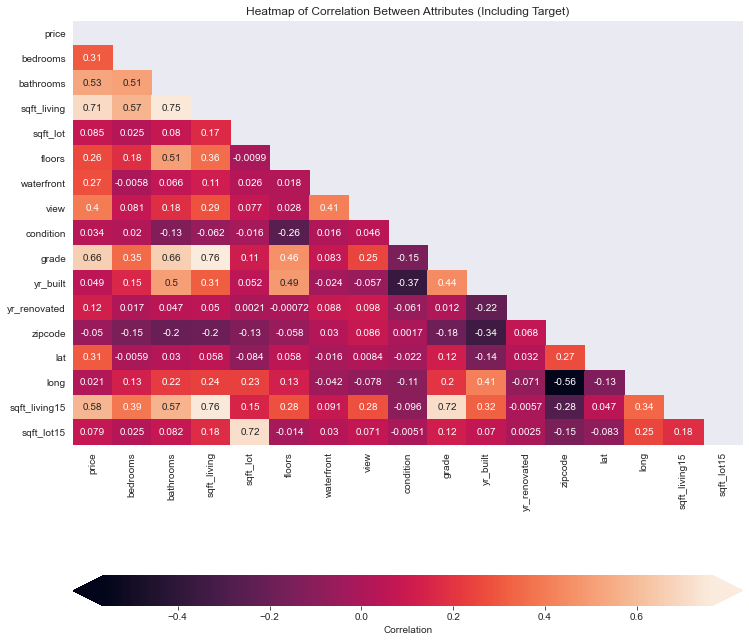

In [19]:

figure , ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

From the above visual summary, we can tell that there is a high correlation between some predictors like (sqft_living and sqft_above), (sqft_living and bathrooms), (sqft_living and grade) etc..

Below, we'll come up with a way of dealing with multicollinearity.

In [20]:
target = new_data['price']
pred = new_data.drop(['price'], axis=1)

In [27]:
vif = [variance_inflation_factor(pred.values, i) for i in range(pred.shape[1])]
pd.Series(vif, index=pred.columns, name="Variance Inflation Factor")

bedrooms         2.296042e+01
bathrooms        2.816622e+01
sqft_living      3.079942e+01
sqft_lot         2.374710e+00
floors           1.383841e+01
waterfront       1.220834e+00
view             1.502334e+00
condition        3.459771e+01
grade            1.472818e+02
yr_built         9.548293e+03
yr_renovated     1.188608e+00
zipcode          1.582288e+06
lat              1.368410e+05
long             1.327270e+06
sqft_living15    2.664641e+01
sqft_lot15       2.579941e+00
Name: Variance Inflation Factor, dtype: float64

In [21]:
pred_corr = pred.corr()

In [22]:
df=pred_corr.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [23]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_living15)",0.944019
"(sqft_living, grade)",0.940202
"(sqft_lot15, sqft_lot)",0.938940
"(sqft_living, bathrooms)",0.929292
"(sqft_living15, grade)",0.925254
"(bathrooms, grade)",0.916343
"(zipcode, long)",0.901793
"(sqft_living15, bathrooms)",0.850374
"(bedrooms, sqft_living)",0.797106


Above, we got the pairs of data with high multicollinearity with each other.

In [24]:
new_pred = pred.drop([ 'sqft_living15', 'sqft_lot15', 'zipcode'], axis=1)
new_pred

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,47.7210,-122.319
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,47.5208,-122.393
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,47.6168,-122.045
5,4,4.50,5420,101930,1.0,0.0,0.0,3,11,2001,0.0,47.6561,-122.005
6,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1995,0.0,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,0.0,0.0,3,8,2008,0.0,47.5773,-122.409
21592,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,47.6993,-122.346
21593,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,47.5107,-122.362
21594,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,47.5944,-122.299


In [25]:
df2=new_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [26]:
df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(sqft_living, grade)",0.764251
"(sqft_living, bathrooms)",0.753846


In [8]:
target_corr =  data.corr()['price'].map(abs).sort_values(ascending=False)
target_corr


price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
Name: price, dtype: float64